Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


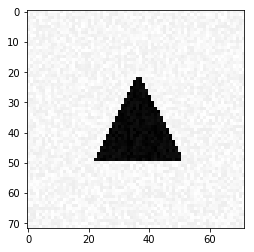

In [2]:
# Import libraries and generate data
import mp1 as data_generation
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
import numpy as np

[X_train_raw, Y_train_raw] = data_generation.generate_dataset_classification(300, 20, True)


In [45]:
print("X_train shape", X_train_raw.shape, "Y_train shape", Y_train_raw.shape)
X_train = X_train_raw.reshape(-1, 72, 72, 1)
Y_train = np_utils.to_categorical(Y_train_raw)
print("X_train shape", X_train.shape, "Y_train shape", Y_train.shape)

X_train shape (300, 5184) Y_train shape (300,)
X_train shape (300, 72, 72, 1) Y_train shape (300, 3)


In [46]:
# Defining a classifier
K.clear_session()

In [47]:
# Building a model
classifier = Sequential()
classifier.add(Conv2D(16, kernel_size=(5,5), input_shape = (X_train.shape[1], X_train.shape[2],1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dropout(.25))
classifier.add(Dense(20, activation = 'relu'))
classifier.add(Dense(3, activation = 'softmax'))

#%% Compiling

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
# Compiling and training
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, Y_train, epochs = 20, batch_size = 32, verbose = 1)

Epoch 1/20
300/300 [==============================] - 1s 4ms/step - loss: 1.1411 - acc: 0.3867
Epoch 2/20
300/300 [==============================] - 1s 3ms/step - loss: 0.9294 - acc: 0.6000
Epoch 3/20
300/300 [==============================] - 1s 3ms/step - loss: 0.7943 - acc: 0.6833
Epoch 4/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6612 - acc: 0.7900
Epoch 5/20
300/300 [==============================] - 1s 3ms/step - loss: 0.5790 - acc: 0.7900
Epoch 6/20
300/300 [==============================] - 1s 3ms/step - loss: 0.4814 - acc: 0.8433
Epoch 7/20
300/300 [==============================] - 1s 3ms/step - loss: 0.4380 - acc: 0.8733
Epoch 8/20
300/300 [==============================] - 1s 3ms/step - loss: 0.3700 - acc: 0.9000
Epoch 9/20
300/300 [==============================] - 1s 3ms/step - loss: 0.3540 - acc: 0.8967
Epoch 10/20
300/300 [==============================] - 1s 3ms/step - loss: 0.3233 - acc: 0.9100
Epoch 11/20
300/300 [============================

In [3]:
# Get test data
from keras.utils import np_utils
[X_test_raw, Y_test_raw] = data_generation.generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [ ]:
# Reshape Test
X_test = X_test.reshape(-1, 72, 72, 1)
Y_test = Y_test_raw